# EOSC 582 Assignment III (L2_LAC_OC granule)

In [1]:
import glob
import h5py
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import site
site.addsitedir('_libs')
from reproject import *

# Read L2 File

In [4]:
h5_name=glob.glob('_data/A2014*.h5')[0]
print(h5_name)
with h5py.File(h5_name, 'r') as f:
    lats=f['Navigation Data/latitude'][...]
    lons=f['Navigation Data/longitude'][...]
    chlor=f['Geophysical Data/chlor_a']
    chlor_array=chlor[...]
    chlor_bad_value=chlor.attrs['bad_value_scaled']

_data\A2014278212000.L2_LAC_OC.h5


# Reprojection

In [5]:
chlor_array[chlor_array==chlor_bad_value]=np.nan
chlor_a, longitude, latitude, _ = \
    reproj_L1B(chlor_array, lons, lats, [lons.min(), lons.max()], [lats.min(), lats.max()], 0.05)

#Plots

In [7]:
keys=dict(projection='mill', llcrnrlat=15, urcrnrlat=40,\
           llcrnrlon=-140, urcrnrlon=-105, resolution='l')

In [8]:
def draw_map(keys):
    fig=plt.figure(figsize=(9, 9))
    ax=fig.gca()
    proj=Basemap(**keys)
    parallels=np.arange(-90, 90, 5)
    meridians=np.arange(0, 360, 5)
    proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, latmax=90)
    proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, latmax=90)
    proj.drawcoastlines(linewidth=1.5, linestyle='solid', color='k')
    return fig, ax, proj

## L2_LAC_OC granule

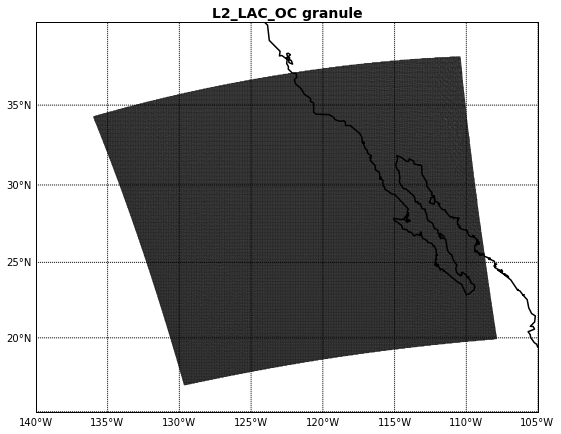

In [9]:
fig, ax, proj = draw_map(keys)
x, y=proj(longitude, latitude)
proj.plot(x[::1, ::1], y[::1, ::1], 'k-', alpha=0.5);
proj.plot(x[::1, ::1].T, y[::1, ::1].T, 'k-', alpha=0.5);
ax.set_title('L2_LAC_OC granule', fontweight='bold', fontsize=14)

## Chlorophyll a concentration

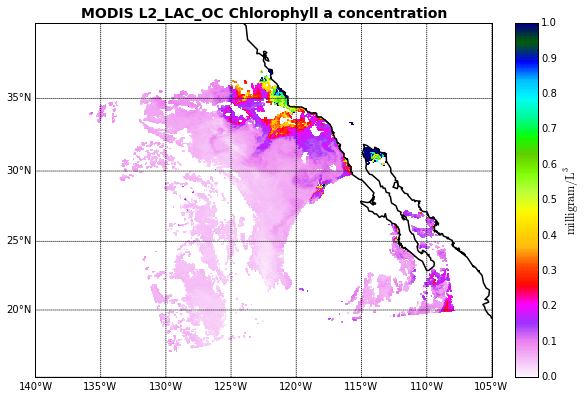

In [10]:
chlor_masked=np.ma.masked_where(np.isnan(chlor_a), chlor_a)
fig, ax, proj = draw_map(keys)
x, y=proj(longitude, latitude)
CS = proj.pcolor(x, y, chlor_masked, vmin=0, vmax=1, cmap=plt.cm.gist_ncar_r)
CBar=proj.colorbar(CS, 'right', size='5%', pad='5%')
CBar.ax.tick_params(axis='y', length=0)
CBar.set_label('$\mathrm{milligram/L^3}$', fontsize=12)
ax.set_title('MODIS L2_LAC_OC Chlorophyll a concentration', fontweight='bold', fontsize=14)